# Part 2D: Scraping Movie Manuscripts

## Goal
- Scrape movie manuscripts from imsdb.com
    - Get full list of movies
    -  compare against tmdb data
    -  scrape and save as... html files?


In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
url = "https://imsdb.com/all-scripts.html"

In [3]:
resp = requests.get(url)
soup = BeautifulSoup(resp.content)
print(soup.prettify()[:1000])

<html>
 <head>
  <title>
   All Movie Scripts at IMSDb
  </title>
  <meta content="Movie Scripts full listing at the Internet Movie Script Database." name="description"/>
  <meta content="Movie Scripts list, All Movie Scripts" name="keywords"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="true" name="HandheldFriendly"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="EN" http-equiv="Content-Language"/>
  <meta content="Document" name="objecttype"/>
  <meta content="INDEX, FOLLOW" name="ROBOTS"/>
  <meta content="Movie scripts, Film scripts" name="Subject"/>
  <meta content="General" name="rating"/>
  <meta content="Global" name="distribution"/>
  <meta content="2 days" name="revisit-after"/>
  <link href="/style.css" rel="stylesheet" type="text/css"/>
  <script async="" src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js">
  </script>
 </head>
 <body bottommargin="0" id="mainbody" topmargin="0

- Entries are stored as a column in a table

In [4]:
# df_list = pd.read_html(url,)
# len(df_list)

In [5]:
# df_list[0]

In [6]:
# df_list[11]

In [7]:
# Get all headers
found_headers = soup.find_all('h1')

for h1 in found_headers:
    if 'All Movie Scripts'.lower() in h1.text.lower():
        print('h1 is now correct tag')
        break
        
h1

h1 is now correct tag


<h1>All Movie Scripts on IMSDb (A-Z)</h1>

# Get the List of tags

## Get siblings from h1

In [8]:
h1.next_sibling()

[<a href="/Movie Scripts/10 Things I Hate About You Script.html" title="10 Things I Hate About You Script">10 Things I Hate About You</a>,
 <br/>,
 <i>Written by Karen McCullah Lutz,Kirsten Smith,William Shakespeare</i>,
 <br/>]

In [9]:
# Get list of sibling tags
sibling_list = [row for row in h1.next_siblings]
len(sibling_list)

1218

In [10]:
sibling_list[:5]

[<p><a href="/Movie Scripts/10 Things I Hate About You Script.html" title="10 Things I Hate About You Script">10 Things I Hate About You</a> (1997-11 Draft)<br/><i>Written by Karen McCullah Lutz,Kirsten Smith,William Shakespeare</i><br/></p>,
 <p><a href="/Movie Scripts/12 Script.html" title="12 Script">12</a> (Undated Draft)<br/><i>Written by Lawrence Bridges</i><br/></p>,
 <p><a href="/Movie Scripts/12 and Holding Script.html" title="12 and Holding Script">12 and Holding</a> (2004-04 Draft)<br/><i>Written by Anthony Cipriano</i><br/></p>,
 <p><a href="/Movie Scripts/12 Monkeys Script.html" title="12 Monkeys Script">12 Monkeys</a> (1994-06 Draft)<br/><i>Written by David Peoples,Janet Peoples</i><br/></p>,
 <p><a href="/Movie Scripts/12 Years a Slave Script.html" title="12 Years a Slave Script">12 Years a Slave</a> (Undated Draft)<br/><i>Written by John Ridley</i><br/></p>]

In [11]:
from IPython.display import display, HTML
HTML(str(sibling_list[5]))

### Processing Individual Movie Info

- Each movie has:
    - Link with title
    - Parentheses with:
        -  Date
        - and Info about if its a Draft
    - List of Authors (in italics)

In [12]:
# Selecting Example Tag
tag =  sibling_list[0]
tag

<p><a href="/Movie Scripts/10 Things I Hate About You Script.html" title="10 Things I Hate About You Script">10 Things I Hate About You</a> (1997-11 Draft)<br/><i>Written by Karen McCullah Lutz,Kirsten Smith,William Shakespeare</i><br/></p>

In [13]:
# Getting just the link
link = tag.find('a')
link

<a href="/Movie Scripts/10 Things I Hate About You Script.html" title="10 Things I Hate About You Script">10 Things I Hate About You</a>

In [14]:
# Use urllib to parse websites
import urllib

In [15]:
url

'https://imsdb.com/all-scripts.html'

In [16]:
# Get parsed url to use to construct absolute url for movie
parsed = urllib.parse.urlparse(url)
parsed

ParseResult(scheme='https', netloc='imsdb.com', path='/all-scripts.html', params='', query='', fragment='')

In [17]:
# Saving base url for website
base_url = parsed.scheme + "://" + parsed.netloc
base_url

'https://imsdb.com'

In [18]:
# Need to encode link titles
link['href']

'/Movie Scripts/10 Things I Hate About You Script.html'

In [19]:
# Use parse.quote to get correct path
urllib.parse.quote(link['href'])

'/Movie%20Scripts/10%20Things%20I%20Hate%20About%20You%20Script.html'

In [20]:
# Construct absoolute url
script_url  = urllib.parse.urljoin(base_url, urllib.parse.quote(link['href']))
script_url

'https://imsdb.com/Movie%20Scripts/10%20Things%20I%20Hate%20About%20You%20Script.html'

In [21]:
def get_url_from_tag(link_tag, abs_url = 'https://imsdb.com/all-scripts.html' ):
    import urllib
    parsed = urllib.parse.urlparse(abs_url)
    # Saving base url for website
    base_url = parsed.scheme + "://" + parsed.netloc
    
    # Use parse.quote to get correct path
    url_path  = urllib.parse.quote(link_tag['href'])
    script_url = urllib.parse.urljoin(base_url, url_path)
    return script_url
    


In [22]:
demo_index = 3 
demo_movie = sibling_list[demo_index]
HTML(str(demo_movie))

In [23]:
# Test function
script_url = get_url_from_tag(demo_movie.find('a'))
script_url

'https://imsdb.com/Movie%20Scripts/12%20Monkeys%20Script.html'

- Each movie has a page with more metadata, plus the link to the ~~actual html script~~ page with metadata and link to script.
- Example final script url: https://imsdb.com/scripts/12-Monkeys.html

In [24]:
# Get soup for demo omovie
resp_movie = requests.get(script_url)
soup_movie = BeautifulSoup(resp_movie.content)
print(soup_movie.prettify()[:1000])

<html>
 <head>
  <!-- Google tag (gtag.js) -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-W5BXG8HCH3">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'G-W5BXG8HCH3');
  </script>
  <title>
   12 Monkeys Script at IMSDb.
  </title>
  <meta content="12 Monkeys script at the Internet Movie Script Database." name="description"/>
  <meta content="12 Monkeys script, 12 Monkeys movie script, 12 Monkeys film script" name="keywords"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="true" name="HandheldFriendly"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="EN" http-equiv="Content-Language"/>
  <meta content="Document" name="objecttype"/>
  <meta content="INDEX, FOLLOW" name="ROBOTS"/>
  <meta content="Movie scripts, Film scripts" name="Subject"/>
  <meta content="General


In [25]:
HTML(str(soup_movie))

In [26]:
# Figuring out 
title_for_link = demo_movie.find("a").text
title_for_link

'12 Monkeys'

- Example final script url: https://imsdb.com/scripts/12-Monkeys.html

In [27]:
# Constructing script url
title_for_link.replace(' ','-')

'12-Monkeys'

In [28]:
def make_script_url_from_tag(link_tag, abs_url = 'https://imsdb.com/all-scripts.html' ):
    import urllib
    parsed = urllib.parse.urlparse(abs_url)
    # Saving base url for website
    base_url = parsed.scheme + "://" + parsed.netloc
    
    # Use parse.quote to get correct path
    # url_path  = urllib.parse.quote(link_tag['href'])
    url_path = link_tag.text.replace(' ','-')
    script_url = urllib.parse.urljoin(base_url,'scripts/'+ url_path+'.html')
    return script_url
    
make_script_url_from_tag(demo_movie.find('a'))

'https://imsdb.com/scripts/12-Monkeys.html'

## Making the DataFrame of Movie Script Listings

In [29]:
tag

<p><a href="/Movie Scripts/10 Things I Hate About You Script.html" title="10 Things I Hate About You Script">10 Things I Hate About You</a> (1997-11 Draft)<br/><i>Written by Karen McCullah Lutz,Kirsten Smith,William Shakespeare</i><br/></p>

In [30]:
# Get Movie title
movie_title = tag.a.text
movie_title

'10 Things I Hate About You'

In [31]:
author_string = tag.find('i').text
author_string

'Written by Karen McCullah Lutz,Kirsten Smith,William Shakespeare'

In [32]:
author_string.split('by')

['Written ', ' Karen McCullah Lutz,Kirsten Smith,William Shakespeare']

In [33]:
# Author list
author_list = author_string.split('by')[-1].strip().split(",")
author_list

['Karen McCullah Lutz', 'Kirsten Smith', 'William Shakespeare']

#### Use regex to get data / Draft ?

In [34]:
import re
expr_string = r"(\(.+?\))"
expr = re.compile(expr_string)
expr

re.compile(r'(\(.+?\))', re.UNICODE)

In [35]:
parentheses = expr.findall(tag.text)[0]
parentheses

'(1997-11 Draft)'

In [36]:
# Split into date and draft type
# Added * to catch movies that had more complex draft types
script_date,*script_type =  parentheses.strip("(").strip(")").split(' ')

# Accounting for movies with "Updated Draft"
script_type = " ".join(script_type)
print(script_date, script_type,sep='\n')

1997-11
Draft


In [37]:
get_url_from_tag(tag.find('a'))

'https://imsdb.com/Movie%20Scripts/10%20Things%20I%20Hate%20About%20You%20Script.html'

In [38]:
def extract_scipt_info_from_tag(tag):
    import re

    # Get Movie title
    movie_title = tag.a.text

    # Get list of authors (as STRING)
    author_string = tag.find('i').text.split('by')[-1].strip()

    # Split parentheses
    expr_string = r"(\(.+?\))"
    expr = re.compile(expr_string)
    parentheses = expr.findall(tag.text)[0]

    # Split into date and draft type
    # Added * to catch movies that had more complex draft types
    script_date,*script_type =  parentheses.strip("(").strip(")").split(' ')
    
    # Accounting for movies with "Updated Draft"
    script_type = " ".join(script_type)

    #Movie url 
    movie_url = get_url_from_tag(tag.find('a'))

    #Get direct script url
    script_url = make_script_url_from_tag(tag.find('a'))

    info = {'title':movie_title, 'author':author_string,'scipt date':script_date,
           'script type':script_type,
           'movie url':movie_url,
            'script url':script_url}
    return info

In [39]:
extract_scipt_info_from_tag(sibling_list[5])

{'title': '127 Hours',
 'author': 'Simon Beaufoy,Danny Boyle',
 'scipt date': 'Undated',
 'script type': 'Draft',
 'movie url': 'https://imsdb.com/Movie%20Scripts/127%20Hours%20Script.html',
 'script url': 'https://imsdb.com/scripts/127-Hours.html'}

## Putting it all together 

In [40]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [41]:
url = "https://imsdb.com/all-scripts.html"

In [42]:
resp = requests.get(url)
soup = BeautifulSoup(resp.content)
print(soup.prettify()[:1000])

<html>
 <head>
  <title>
   All Movie Scripts at IMSDb
  </title>
  <meta content="Movie Scripts full listing at the Internet Movie Script Database." name="description"/>
  <meta content="Movie Scripts list, All Movie Scripts" name="keywords"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="true" name="HandheldFriendly"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="EN" http-equiv="Content-Language"/>
  <meta content="Document" name="objecttype"/>
  <meta content="INDEX, FOLLOW" name="ROBOTS"/>
  <meta content="Movie scripts, Film scripts" name="Subject"/>
  <meta content="General" name="rating"/>
  <meta content="Global" name="distribution"/>
  <meta content="2 days" name="revisit-after"/>
  <link href="/style.css" rel="stylesheet" type="text/css"/>
  <script async="" src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js">
  </script>
 </head>
 <body bottommargin="0" id="mainbody" topmargin="0

In [43]:
# Get all headers
found_headers = soup.find_all('h1')

for h1 in found_headers:
    if 'All Movie Scripts'.lower() in h1.text.lower():
        # print('h1 is now correct tag')
        break
        
# Get list of sibling tags
sibling_list = [row for row in h1.next_siblings]


In [44]:
# Apply to all siblings in a loop
script_data = []

for i,tag in enumerate(sibling_list):
    try:
        info  = extract_scipt_info_from_tag(tag)
        script_data.append(info)
    except Exception as e:
        print(f'[!] Error with tag #:{i}')
        display(e)

[!] Error with tag #:1215


AttributeError("'NoneType' object has no attribute 'text'")

[!] Error with tag #:1216


AttributeError("'NoneType' object has no attribute 'text'")

[!] Error with tag #:1217


AttributeError("'NavigableString' object has no attribute 'a'")

In [45]:
df = pd.DataFrame(script_data)
df

,title,author,scipt date,script type,movie url,script url
0,10 Things I Hate About You,"Karen McCullah Lutz,Kirsten Smith,William Shak...",1997-11,Draft,https://imsdb.com/Movie%20Scripts/10%20Things%...,https://imsdb.com/scripts/10-Things-I-Hate-Abo...
1,12,Lawrence Bridges,Undated,Draft,https://imsdb.com/Movie%20Scripts/12%20Script....,https://imsdb.com/scripts/12.html
2,12 and Holding,Anthony Cipriano,2004-04,Draft,https://imsdb.com/Movie%20Scripts/12%20and%20H...,https://imsdb.com/scripts/12-and-Holding.html
3,12 Monkeys,"David Peoples,Janet Peoples",1994-06,Draft,https://imsdb.com/Movie%20Scripts/12%20Monkeys...,https://imsdb.com/scripts/12-Monkeys.html
4,12 Years a Slave,John Ridley,Undated,Draft,https://imsdb.com/Movie%20Scripts/12%20Years%2...,https://imsdb.com/scripts/12-Years-a-Slave.html
...,...,...,...,...,...,...
1210,You've Got Mail,"Nora Ephron,Delia Ephron",1998-02,Draft,https://imsdb.com/Movie%20Scripts/You%27ve%20G...,https://imsdb.com/scripts/You've-Got-Mail.html
1211,Youth in Revolt,Gustin Nash,2007-07,Draft,https://imsdb.com/Movie%20Scripts/Youth%20in%2...,https://imsdb.com/scripts/Youth-in-Revolt.html
1212,Zero Dark Thirty,Mark Boal,2011-10,Draft,https://imsdb.com/Movie%20Scripts/Zero%20Dark%...,https://imsdb.com/scripts/Zero-Dark-Thirty.html
1213,Zerophilia,Martin Curland,2004-03,Draft,https://imsdb.com/Movie%20Scripts/Zerophilia%2...,https://imsdb.com/scripts/Zerophilia.html


### Verify Resuls

In [46]:
df['script type'].value_counts()

Draft                     980
Shooting draft             57
Transcript                 31
Final draft                25
Shooting script            19
First draft                16
Revised draft              13
Second draft               12
Fourth draft                6
Production draft            5
Early draft                 4
Shooting Draft              4
                            3
Third draft                 3
Final shooting script       2
Production Draft            2
Early Draft                 2
Shooting Script             2
Original draft              1
Poltergeist Treatment       1
Final script                1
Late production draft       1
script                      1
Revised first draft         1
of War                      1
Screening script            1
3rd Draft Rewrite           1
Final screening script      1
Bijou                       1
Fifth draft                 1
Fourth Draft                1
Second Draft                1
Godzilla                    1
Final shoo

### Save to CSV

In [47]:
import os
# folder = "Data-NLP/scripts/"
# SET VARS FOR LOOP
FOLDER = "Data-NLP/"
FOLDER_SCRIPTS = f"{FOLDER}scripts/"
os.makedirs(FOLDER_SCRIPTS,exist_ok=True)

fname = FOLDER + 'all-scripts-info.csv'
fname

'Data-NLP/all-scripts-info.csv'

In [48]:
FOLDER_SCRIPTS

'Data-NLP/scripts/'

In [49]:
# Save table of script info
df.to_csv(fname, index=False)

# Downloading Each Script

In [50]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import os
# folder = "Data-NLP/scripts/"
# SET VARS FOR LOOP
# FOLDER = "Data-NLP/"
# FOLDER_SCRIPTS = f"{FOLDER}scripts/"
# os.makedirs(FOLDER_SCRIPTS,exist_ok=True)

# fname = FOLDER + 'all-scripts-info.csv'
df =  pd.read_csv(fname)
df

,title,author,scipt date,script type,movie url,script url
0,10 Things I Hate About You,"Karen McCullah Lutz,Kirsten Smith,William Shak...",1997-11,Draft,https://imsdb.com/Movie%20Scripts/10%20Things%...,https://imsdb.com/scripts/10-Things-I-Hate-Abo...
1,12,Lawrence Bridges,Undated,Draft,https://imsdb.com/Movie%20Scripts/12%20Script....,https://imsdb.com/scripts/12.html
2,12 and Holding,Anthony Cipriano,2004-04,Draft,https://imsdb.com/Movie%20Scripts/12%20and%20H...,https://imsdb.com/scripts/12-and-Holding.html
3,12 Monkeys,"David Peoples,Janet Peoples",1994-06,Draft,https://imsdb.com/Movie%20Scripts/12%20Monkeys...,https://imsdb.com/scripts/12-Monkeys.html
4,12 Years a Slave,John Ridley,Undated,Draft,https://imsdb.com/Movie%20Scripts/12%20Years%2...,https://imsdb.com/scripts/12-Years-a-Slave.html
...,...,...,...,...,...,...
1210,You've Got Mail,"Nora Ephron,Delia Ephron",1998-02,Draft,https://imsdb.com/Movie%20Scripts/You%27ve%20G...,https://imsdb.com/scripts/You've-Got-Mail.html
1211,Youth in Revolt,Gustin Nash,2007-07,Draft,https://imsdb.com/Movie%20Scripts/Youth%20in%2...,https://imsdb.com/scripts/Youth-in-Revolt.html
1212,Zero Dark Thirty,Mark Boal,2011-10,Draft,https://imsdb.com/Movie%20Scripts/Zero%20Dark%...,https://imsdb.com/scripts/Zero-Dark-Thirty.html
1213,Zerophilia,Martin Curland,2004-03,Draft,https://imsdb.com/Movie%20Scripts/Zerophilia%2...,https://imsdb.com/scripts/Zerophilia.html


## Scrape script from script url

In [51]:
df.loc[demo_index]

title                                                 12 Monkeys
author                               David Peoples,Janet Peoples
scipt date                                               1994-06
script type                                                Draft
movie url      https://imsdb.com/Movie%20Scripts/12%20Monkeys...
script url             https://imsdb.com/scripts/12-Monkeys.html
Name: 3, dtype: object

In [52]:
# Get new soup for current movie
resp = requests.get(df.loc[demo_index,'script url'])
soup = BeautifulSoup(resp.content)
print(soup.prettify()[:2000])

<html>
 <head>
  <!-- Google tag (gtag.js) -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-W5BXG8HCH3">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'G-W5BXG8HCH3');
  </script>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="true" name="HandheldFriendly"/>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="EN" http-equiv="Content-Language"/>
  <meta content="Document" name="objecttype"/>
  <meta content="INDEX, FOLLOW" name="ROBOTS"/>
  <meta content="Movie scripts, Film scripts" name="Subject"/>
  <meta content="General" name="rating"/>
  <meta content="Global" name="distribution"/>
  <meta content="2 days" name="revisit-after"/>
  <link href="/style.css" rel="stylesheet" type="text/css"/>
 </head>
 <body bottommargin="0" id="mainbody" topmargin="0">
  <table border="0"

In [53]:
# Find all of the tag with the scrtext class
script_tag_list = soup.body.find_all(attrs={'class':'scrtext'})
len(script_tag_list)

1

In [54]:
# Find the 1 tag with the scrtext class
script_tag = soup.body.find(attrs={'class':'scrtext'})
len(script_tag)

15

In [55]:
print(script_tag.prettify()[:1000])

<td class="scrtext">
 <pre>

<script>
<b><!--
</b>if (window!= top)
top.location.href=location.href
<b>// -->
</b></script>
<title>Twelve Monkeys</title>

<pre>
<b>				TWELVE MONKEYS
</b><b>	    
</b>		          An original screenplay by

				David Peoples
<b>  				     &amp;
</b>				Janet Peoples

				 Inspired by
<b>	    
</b>			LA JETEE, a Chris Marker Film





	Production Draft
	June 27, 1994








<b>	FADE IN:
</b>
<b>	INT.  CONCOURSE/AIRPORT TERMINAL - BAY
</b>
	CLOSE ON A FACE.  A nine year old boy, YOUNG COLE, his eyes wide
	with wonder. watching something intently.  We HEAR the sounds of
	the P.A. SYSTEM droning Flight Information mingled with the
	sounds of urgent SHOUTS, running FEET, EXCLAMATIONS.

	YOUNG COLE'S POV:  twenty yards away, a BLONDE MAN is sprawled on
	the floor, blood oozing from his gaudy Hawaiian shirt.

	A BRUNETTE in a tight dress, her face obscured from YOUNG COLE'S
	view, rushes to the injured man, kne


In [56]:
type(script_tag)

bs4.element.Tag

- May not be worth it to clean up the html files. isntead:
    - just save tag.text?

In [57]:
# Saving raw text
script_text = script_tag.text.strip()
len(script_text)

200184

In [58]:
print(script_text[:1000])

Twelve Monkeys


				TWELVE MONKEYS
	    
		          An original screenplay by

				David Peoples
  				     &
				Janet Peoples

				 Inspired by
	    
			LA JETEE, a Chris Marker Film





	Production Draft
	June 27, 1994








	FADE IN:

	INT.  CONCOURSE/AIRPORT TERMINAL - BAY

	CLOSE ON A FACE.  A nine year old boy, YOUNG COLE, his eyes wide
	with wonder. watching something intently.  We HEAR the sounds of
	the P.A. SYSTEM droning Flight Information mingled with the
	sounds of urgent SHOUTS, running FEET, EXCLAMATIONS.

	YOUNG COLE'S POV:  twenty yards away, a BLONDE MAN is sprawled on
	the floor, blood oozing from his gaudy Hawaiian shirt.

	A BRUNETTE in a tight dress, her face obscured from YOUNG COLE'S
	view, rushes to the injured man, kneels beside him, ministering
	to his wound.

	ANGLE ON YOUNG COLE, flanked by his PARENTS, their faces out of
	view, as they steer him away.

				FATHER'S VOICE (o.s.)
		Come on, Son --this is


#### Saving Script to Disc

In [59]:
# Get the filn
url_path = urllib.parse.urlparse(resp.url).path
url_path

'/scripts/12-Monkeys.html'

In [60]:
FOLDER_SCRIPTS

'Data-NLP/scripts/'

In [61]:
FOLDER.strip("/") + url_path.replace('.html','txt')

'Data-NLP/scripts/12-Monkeystxt'

In [62]:
fname_script = FOLDER.strip("/") + url_path.replace('.html','.txt')
fname_script

'Data-NLP/scripts/12-Monkeys.txt'

In [63]:
with open(fname_script, 'w') as f:
    f.write(fname_script)

In [64]:
# df.loc[demo_index,'script fpath'] = fname_script

In [65]:
# for i in df.index:
    

In [66]:

def sanitize_filename(filename):
    """Sanitize the filename to be compatible with Windows, Linux, and MacOS."""
    # Decode URL-encoded characters
    filename = urllib.parse.unquote(filename)
    # Replace or remove characters not allowed in file names
    filename = re.sub(r'[:<>|"?*\\\/]+', "-", filename)
    return filename



def get_script_text(script_url, FOLDER, return_script= False):#FOLDER='Data-NLP/'):
    # Get new soup for current movie
    resp = requests.get(script_url)
    soup = BeautifulSoup(resp.content)

    # Find the 1 tag with the scrtext class
    script_tag = soup.body.find(attrs={'class':'scrtext'})
    # Saving raw text
    script_text = script_tag.text.strip()

    # Set filename based on url
    url_path = urllib.parse.urlparse(resp.url).path.lstrip('/')
    dirname = os.path.dirname(url_path)
    basename =  os.path.basename(url_path)
    clean_basename = sanitize_filename(basename.replace('.html','.txt'))

    # if FOLDER.endswith('/') & clean_basename.startswith('/'):
    #     FOLDER =  FOLDER.strip("/")
        
    fname_script = os.path.join(FOLDER,dirname,clean_basename)

    
    
    if return_script == True:
        return script_text
        
    
    else:
        with open(fname_script, 'w') as f:
            f.write(script_text)
        
        return fname_script

In [67]:
i = 4
df.loc[4]

title                                           12 Years a Slave
author                                               John Ridley
scipt date                                               Undated
script type                                                Draft
movie url      https://imsdb.com/Movie%20Scripts/12%20Years%2...
script url       https://imsdb.com/scripts/12-Years-a-Slave.html
Name: 4, dtype: object

In [68]:
FOLDER_SCRIPTS

'Data-NLP/scripts/'

In [69]:
# resp = requests
# Set filename based on url
url_path = urllib.parse.urlparse(resp.url).path
dirname = os.path.dirname(url_path)
basename =  os.path.basename(url_path)

clean_basename = sanitize_filename(basename.replace('.html','.txt'))

FOLDER_ = FOLDER # Tempz
if FOLDER_.endswith('/') & clean_basename.startswith('/'):
    clean_basename =  clean_basename.lstrip("/")
    
fname_script = os.path.join(FOLDER_,clean_basename)
fname_script

'Data-NLP/12-Monkeys.txt'

In [70]:
os.path.join(FOLDER_,dirname,clean_basename)

'/scripts/12-Monkeys.txt'

In [71]:
# # Do to entire dataframe
# fname_script = FOLDER.strip("/") + url_path.replace('.html','.txt')

In [72]:
df.loc[i, 'script fpath'] = get_script_text(df.loc[i,'script url'], FOLDER, return_script=False)
df

,title,author,scipt date,script type,movie url,script url,script fpath
0,10 Things I Hate About You,"Karen McCullah Lutz,Kirsten Smith,William Shak...",1997-11,Draft,https://imsdb.com/Movie%20Scripts/10%20Things%...,https://imsdb.com/scripts/10-Things-I-Hate-Abo...,NaN
1,12,Lawrence Bridges,Undated,Draft,https://imsdb.com/Movie%20Scripts/12%20Script....,https://imsdb.com/scripts/12.html,NaN
2,12 and Holding,Anthony Cipriano,2004-04,Draft,https://imsdb.com/Movie%20Scripts/12%20and%20H...,https://imsdb.com/scripts/12-and-Holding.html,NaN
3,12 Monkeys,"David Peoples,Janet Peoples",1994-06,Draft,https://imsdb.com/Movie%20Scripts/12%20Monkeys...,https://imsdb.com/scripts/12-Monkeys.html,NaN
4,12 Years a Slave,John Ridley,Undated,Draft,https://imsdb.com/Movie%20Scripts/12%20Years%2...,https://imsdb.com/scripts/12-Years-a-Slave.html,Data-NLP/scripts/12-Years-a-Slave.txt
...,...,...,...,...,...,...,...
1210,You've Got Mail,"Nora Ephron,Delia Ephron",1998-02,Draft,https://imsdb.com/Movie%20Scripts/You%27ve%20G...,https://imsdb.com/scripts/You've-Got-Mail.html,NaN
1211,Youth in Revolt,Gustin Nash,2007-07,Draft,https://imsdb.com/Movie%20Scripts/Youth%20in%2...,https://imsdb.com/scripts/Youth-in-Revolt.html,NaN
1212,Zero Dark Thirty,Mark Boal,2011-10,Draft,https://imsdb.com/Movie%20Scripts/Zero%20Dark%...,https://imsdb.com/scripts/Zero-Dark-Thirty.html,NaN
1213,Zerophilia,Martin Curland,2004-03,Draft,https://imsdb.com/Movie%20Scripts/Zerophilia%2...,https://imsdb.com/scripts/Zerophilia.html,NaN


In [73]:
FOLDER

'Data-NLP/'

In [74]:
df

,title,author,scipt date,script type,movie url,script url,script fpath
0,10 Things I Hate About You,"Karen McCullah Lutz,Kirsten Smith,William Shak...",1997-11,Draft,https://imsdb.com/Movie%20Scripts/10%20Things%...,https://imsdb.com/scripts/10-Things-I-Hate-Abo...,NaN
1,12,Lawrence Bridges,Undated,Draft,https://imsdb.com/Movie%20Scripts/12%20Script....,https://imsdb.com/scripts/12.html,NaN
2,12 and Holding,Anthony Cipriano,2004-04,Draft,https://imsdb.com/Movie%20Scripts/12%20and%20H...,https://imsdb.com/scripts/12-and-Holding.html,NaN
3,12 Monkeys,"David Peoples,Janet Peoples",1994-06,Draft,https://imsdb.com/Movie%20Scripts/12%20Monkeys...,https://imsdb.com/scripts/12-Monkeys.html,NaN
4,12 Years a Slave,John Ridley,Undated,Draft,https://imsdb.com/Movie%20Scripts/12%20Years%2...,https://imsdb.com/scripts/12-Years-a-Slave.html,Data-NLP/scripts/12-Years-a-Slave.txt
...,...,...,...,...,...,...,...
1210,You've Got Mail,"Nora Ephron,Delia Ephron",1998-02,Draft,https://imsdb.com/Movie%20Scripts/You%27ve%20G...,https://imsdb.com/scripts/You've-Got-Mail.html,NaN
1211,Youth in Revolt,Gustin Nash,2007-07,Draft,https://imsdb.com/Movie%20Scripts/Youth%20in%2...,https://imsdb.com/scripts/Youth-in-Revolt.html,NaN
1212,Zero Dark Thirty,Mark Boal,2011-10,Draft,https://imsdb.com/Movie%20Scripts/Zero%20Dark%...,https://imsdb.com/scripts/Zero-Dark-Thirty.html,NaN
1213,Zerophilia,Martin Curland,2004-03,Draft,https://imsdb.com/Movie%20Scripts/Zerophilia%2...,https://imsdb.com/scripts/Zerophilia.html,NaN


In [83]:
from tqdm.notebook import tqdm
import time
for i in tqdm(df.index, total=len(df)):
    try:
        df.loc[i, 'script fpath'] = get_script_text(df.loc[i,'script url'], FOLDER, return_script=False)
    except Exception as e:
        display(e)
    time.sleep(.2)

    

  0%|          | 0/1215 [00:00<?, ?it/s]

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'text'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'find'")

AttributeError("'NoneType' object has no attribute 'text'")

AttributeError("'NoneType' object has no attribute 'text'")

<Axes: >

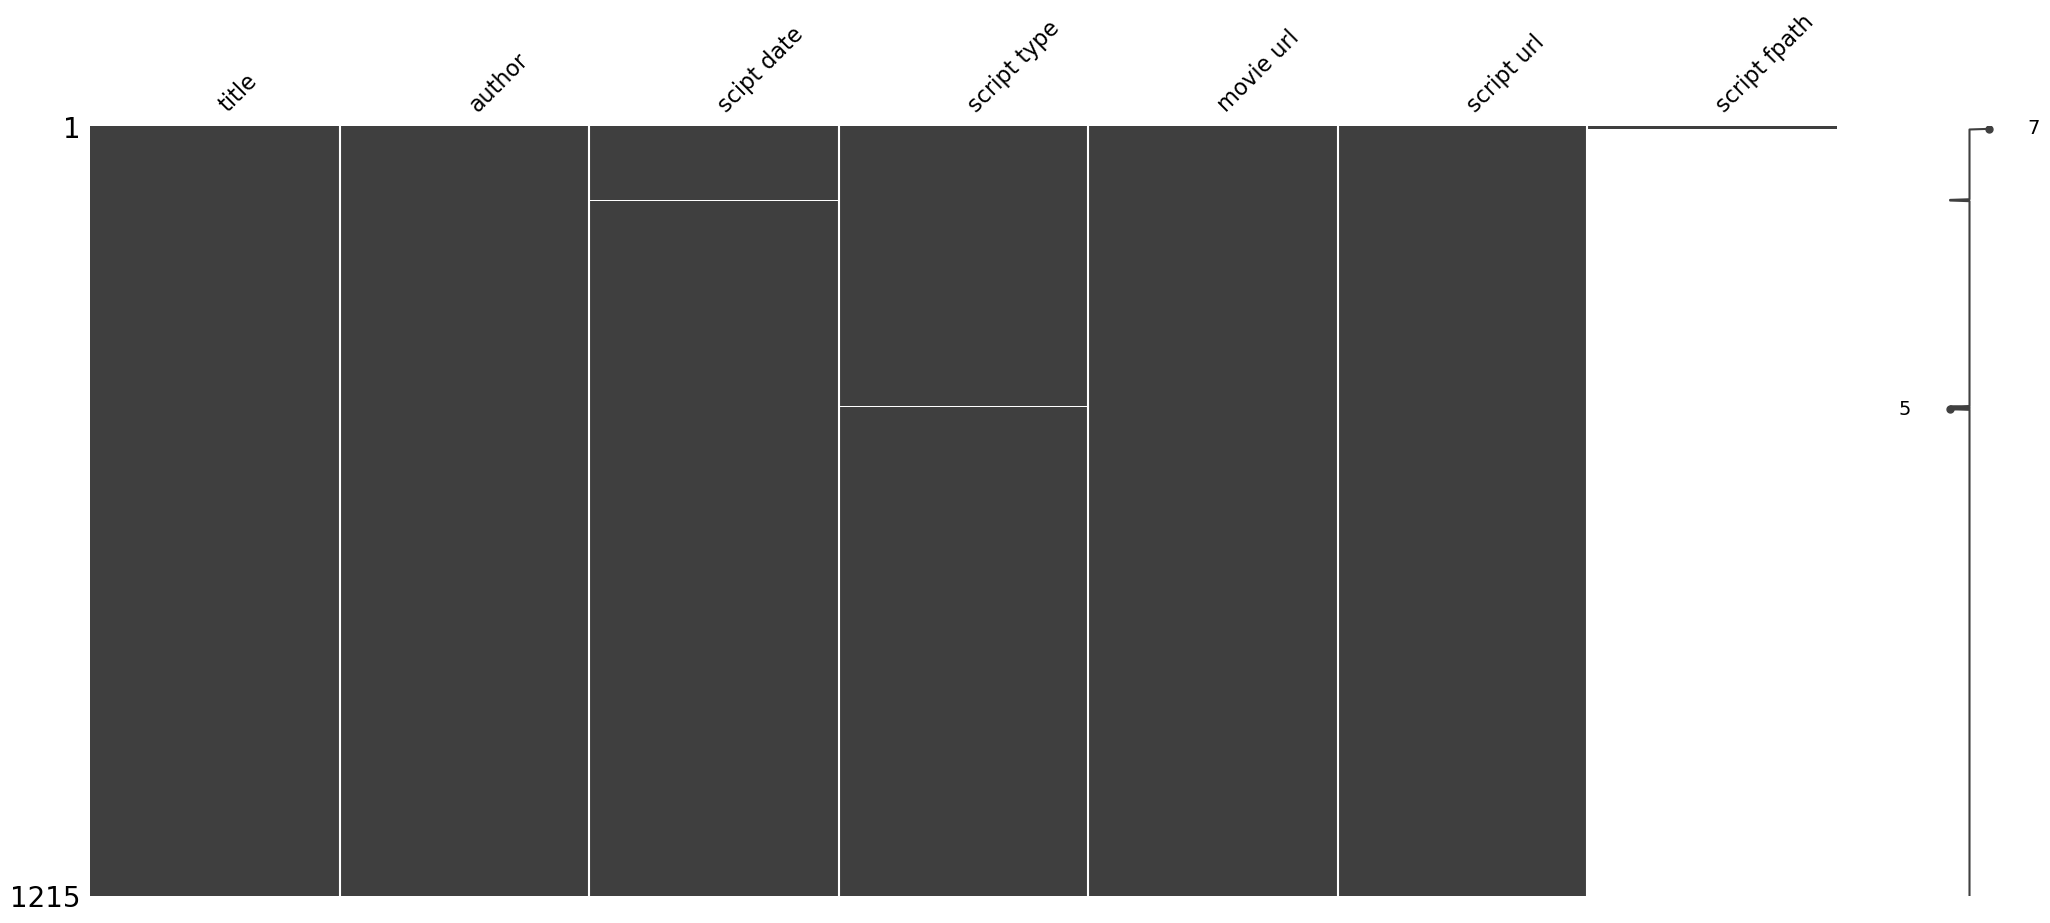

In [76]:
import missingno 
missingno.matrix(df)

In [77]:
df

,title,author,scipt date,script type,movie url,script url,script fpath
0,10 Things I Hate About You,"Karen McCullah Lutz,Kirsten Smith,William Shak...",1997-11,Draft,https://imsdb.com/Movie%20Scripts/10%20Things%...,https://imsdb.com/scripts/10-Things-I-Hate-Abo...,Data-NLP/scripts/10-Things-I-Hate-About-You.txt
1,12,Lawrence Bridges,Undated,Draft,https://imsdb.com/Movie%20Scripts/12%20Script....,https://imsdb.com/scripts/12.html,Data-NLP/scripts/12.txt
2,12 and Holding,Anthony Cipriano,2004-04,Draft,https://imsdb.com/Movie%20Scripts/12%20and%20H...,https://imsdb.com/scripts/12-and-Holding.html,Data-NLP/scripts/12-and-Holding.txt
3,12 Monkeys,"David Peoples,Janet Peoples",1994-06,Draft,https://imsdb.com/Movie%20Scripts/12%20Monkeys...,https://imsdb.com/scripts/12-Monkeys.html,Data-NLP/scripts/12-Monkeys.txt
4,12 Years a Slave,John Ridley,Undated,Draft,https://imsdb.com/Movie%20Scripts/12%20Years%2...,https://imsdb.com/scripts/12-Years-a-Slave.html,Data-NLP/scripts/12-Years-a-Slave.txt
...,...,...,...,...,...,...,...
1210,You've Got Mail,"Nora Ephron,Delia Ephron",1998-02,Draft,https://imsdb.com/Movie%20Scripts/You%27ve%20G...,https://imsdb.com/scripts/You've-Got-Mail.html,NaN
1211,Youth in Revolt,Gustin Nash,2007-07,Draft,https://imsdb.com/Movie%20Scripts/Youth%20in%2...,https://imsdb.com/scripts/Youth-in-Revolt.html,NaN
1212,Zero Dark Thirty,Mark Boal,2011-10,Draft,https://imsdb.com/Movie%20Scripts/Zero%20Dark%...,https://imsdb.com/scripts/Zero-Dark-Thirty.html,NaN
1213,Zerophilia,Martin Curland,2004-03,Draft,https://imsdb.com/Movie%20Scripts/Zerophilia%2...,https://imsdb.com/scripts/Zerophilia.html,NaN


In [78]:
df['script fpath'].isna().sum()

1210

In [79]:
# df['script fpath'].str.contains(',').sum()

In [80]:
fname_out = FOLDER + 'all-scripts-info-files.csv'

In [81]:
df.to_csv(fname_out, index=False)

In [82]:
pd.read_csv(fname_out)

,title,author,scipt date,script type,movie url,script url,script fpath
0,10 Things I Hate About You,"Karen McCullah Lutz,Kirsten Smith,William Shak...",1997-11,Draft,https://imsdb.com/Movie%20Scripts/10%20Things%...,https://imsdb.com/scripts/10-Things-I-Hate-Abo...,Data-NLP/scripts/10-Things-I-Hate-About-You.txt
1,12,Lawrence Bridges,Undated,Draft,https://imsdb.com/Movie%20Scripts/12%20Script....,https://imsdb.com/scripts/12.html,Data-NLP/scripts/12.txt
2,12 and Holding,Anthony Cipriano,2004-04,Draft,https://imsdb.com/Movie%20Scripts/12%20and%20H...,https://imsdb.com/scripts/12-and-Holding.html,Data-NLP/scripts/12-and-Holding.txt
3,12 Monkeys,"David Peoples,Janet Peoples",1994-06,Draft,https://imsdb.com/Movie%20Scripts/12%20Monkeys...,https://imsdb.com/scripts/12-Monkeys.html,Data-NLP/scripts/12-Monkeys.txt
4,12 Years a Slave,John Ridley,Undated,Draft,https://imsdb.com/Movie%20Scripts/12%20Years%2...,https://imsdb.com/scripts/12-Years-a-Slave.html,Data-NLP/scripts/12-Years-a-Slave.txt
...,...,...,...,...,...,...,...
1210,You've Got Mail,"Nora Ephron,Delia Ephron",1998-02,Draft,https://imsdb.com/Movie%20Scripts/You%27ve%20G...,https://imsdb.com/scripts/You've-Got-Mail.html,NaN
1211,Youth in Revolt,Gustin Nash,2007-07,Draft,https://imsdb.com/Movie%20Scripts/Youth%20in%2...,https://imsdb.com/scripts/Youth-in-Revolt.html,NaN
1212,Zero Dark Thirty,Mark Boal,2011-10,Draft,https://imsdb.com/Movie%20Scripts/Zero%20Dark%...,https://imsdb.com/scripts/Zero-Dark-Thirty.html,NaN
1213,Zerophilia,Martin Curland,2004-03,Draft,https://imsdb.com/Movie%20Scripts/Zerophilia%2...,https://imsdb.com/scripts/Zerophilia.html,NaN
